In [1]:
import numpy as np
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
from numpy import abs, sum

In [2]:
def plot(x, y, p):
    fig = pl.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel("$P(x, y)$")
    ax.set_title("Pressure gradient")

In [3]:
def laplacian(p, y, dx, dy, target_residual):
    residual = 1
    pn = np.empty_like(p)

    while residual > target_residual:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (sum(abs(p[:]) - abs(pn[:])) /
                sum(abs(pn[:])))
     
    return p

In [4]:
##variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


##initial conditions
p = np.zeros((ny, nx))  # create a XxY vector of 0's


##plotting aids
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

Initial condition for P


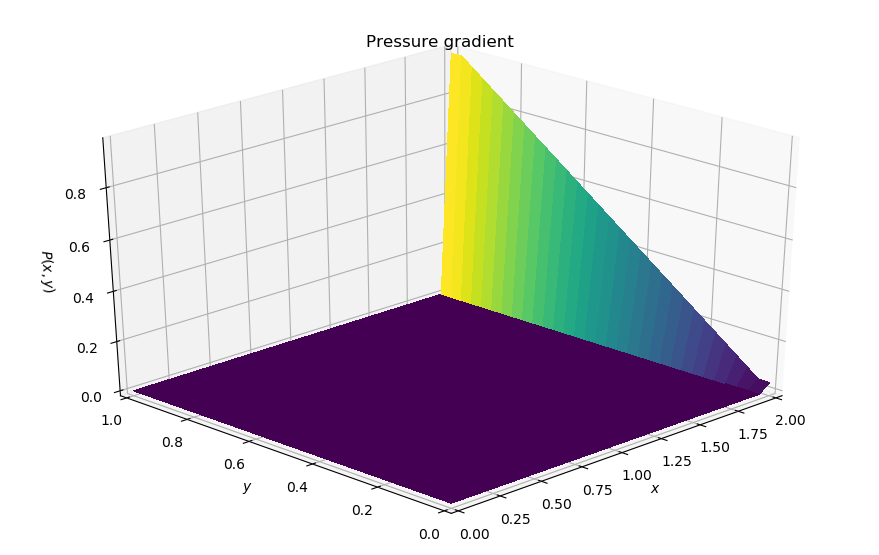

In [5]:
plot(x, y, p)
print("Initial condition for P")

In [ ]:
p = laplacian(p, y, dx, dy, 1e-3)

In [ ]:
plot(x, y, p)